### Multi-Focus Image Fusion Using Maximum Local Variance Technique

##### Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim

##### Reading images

Image Size: (482, 482)


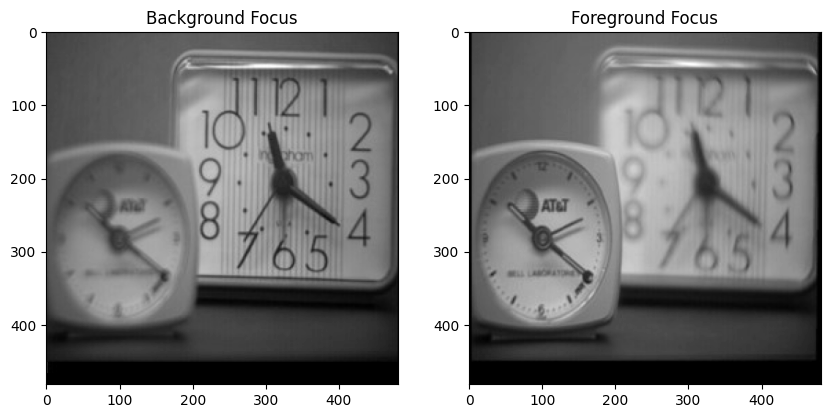

In [2]:
background = np.array( Image.open( "IMG/background.png").convert( "L"))
foreground = np.array( Image.open( "IMG/foreground.png").convert( "L"))

original_shape = background.shape

print( f"Image Size: { original_shape}")

fig = plt.figure( figsize=( 10, 10))

fig.add_subplot( 1, 2, 1)
plt.title( "Background Focus")
plt.imshow( background, cmap="gray")

fig.add_subplot( 1, 2, 2)
plt.title( "Foreground Focus")
plt.imshow( foreground, cmap="gray")

plt.show()

##### Fusion procedure based on maximum local variance

In [3]:
def fusion( img1, img2, window_size = ( 2, 2)):
	height, width = img1.shape

	h, w = window_size

	result = np.zeros( ( height, width))

	for i in range( int( np.ceil( height / h))):
		for j in range( int( np.ceil( width / w))):
			p1 = img1[ i * h: i * h + h, j * w: j * w + w]
			p2 = img2[ i * h: i * h + h, j * w: j * w + w]

			result[ i * h: i * h + h, j * w: j * w + w] = p1 if np.var( p1) > np.var( p2) else p2

	return result

##### Driver #1

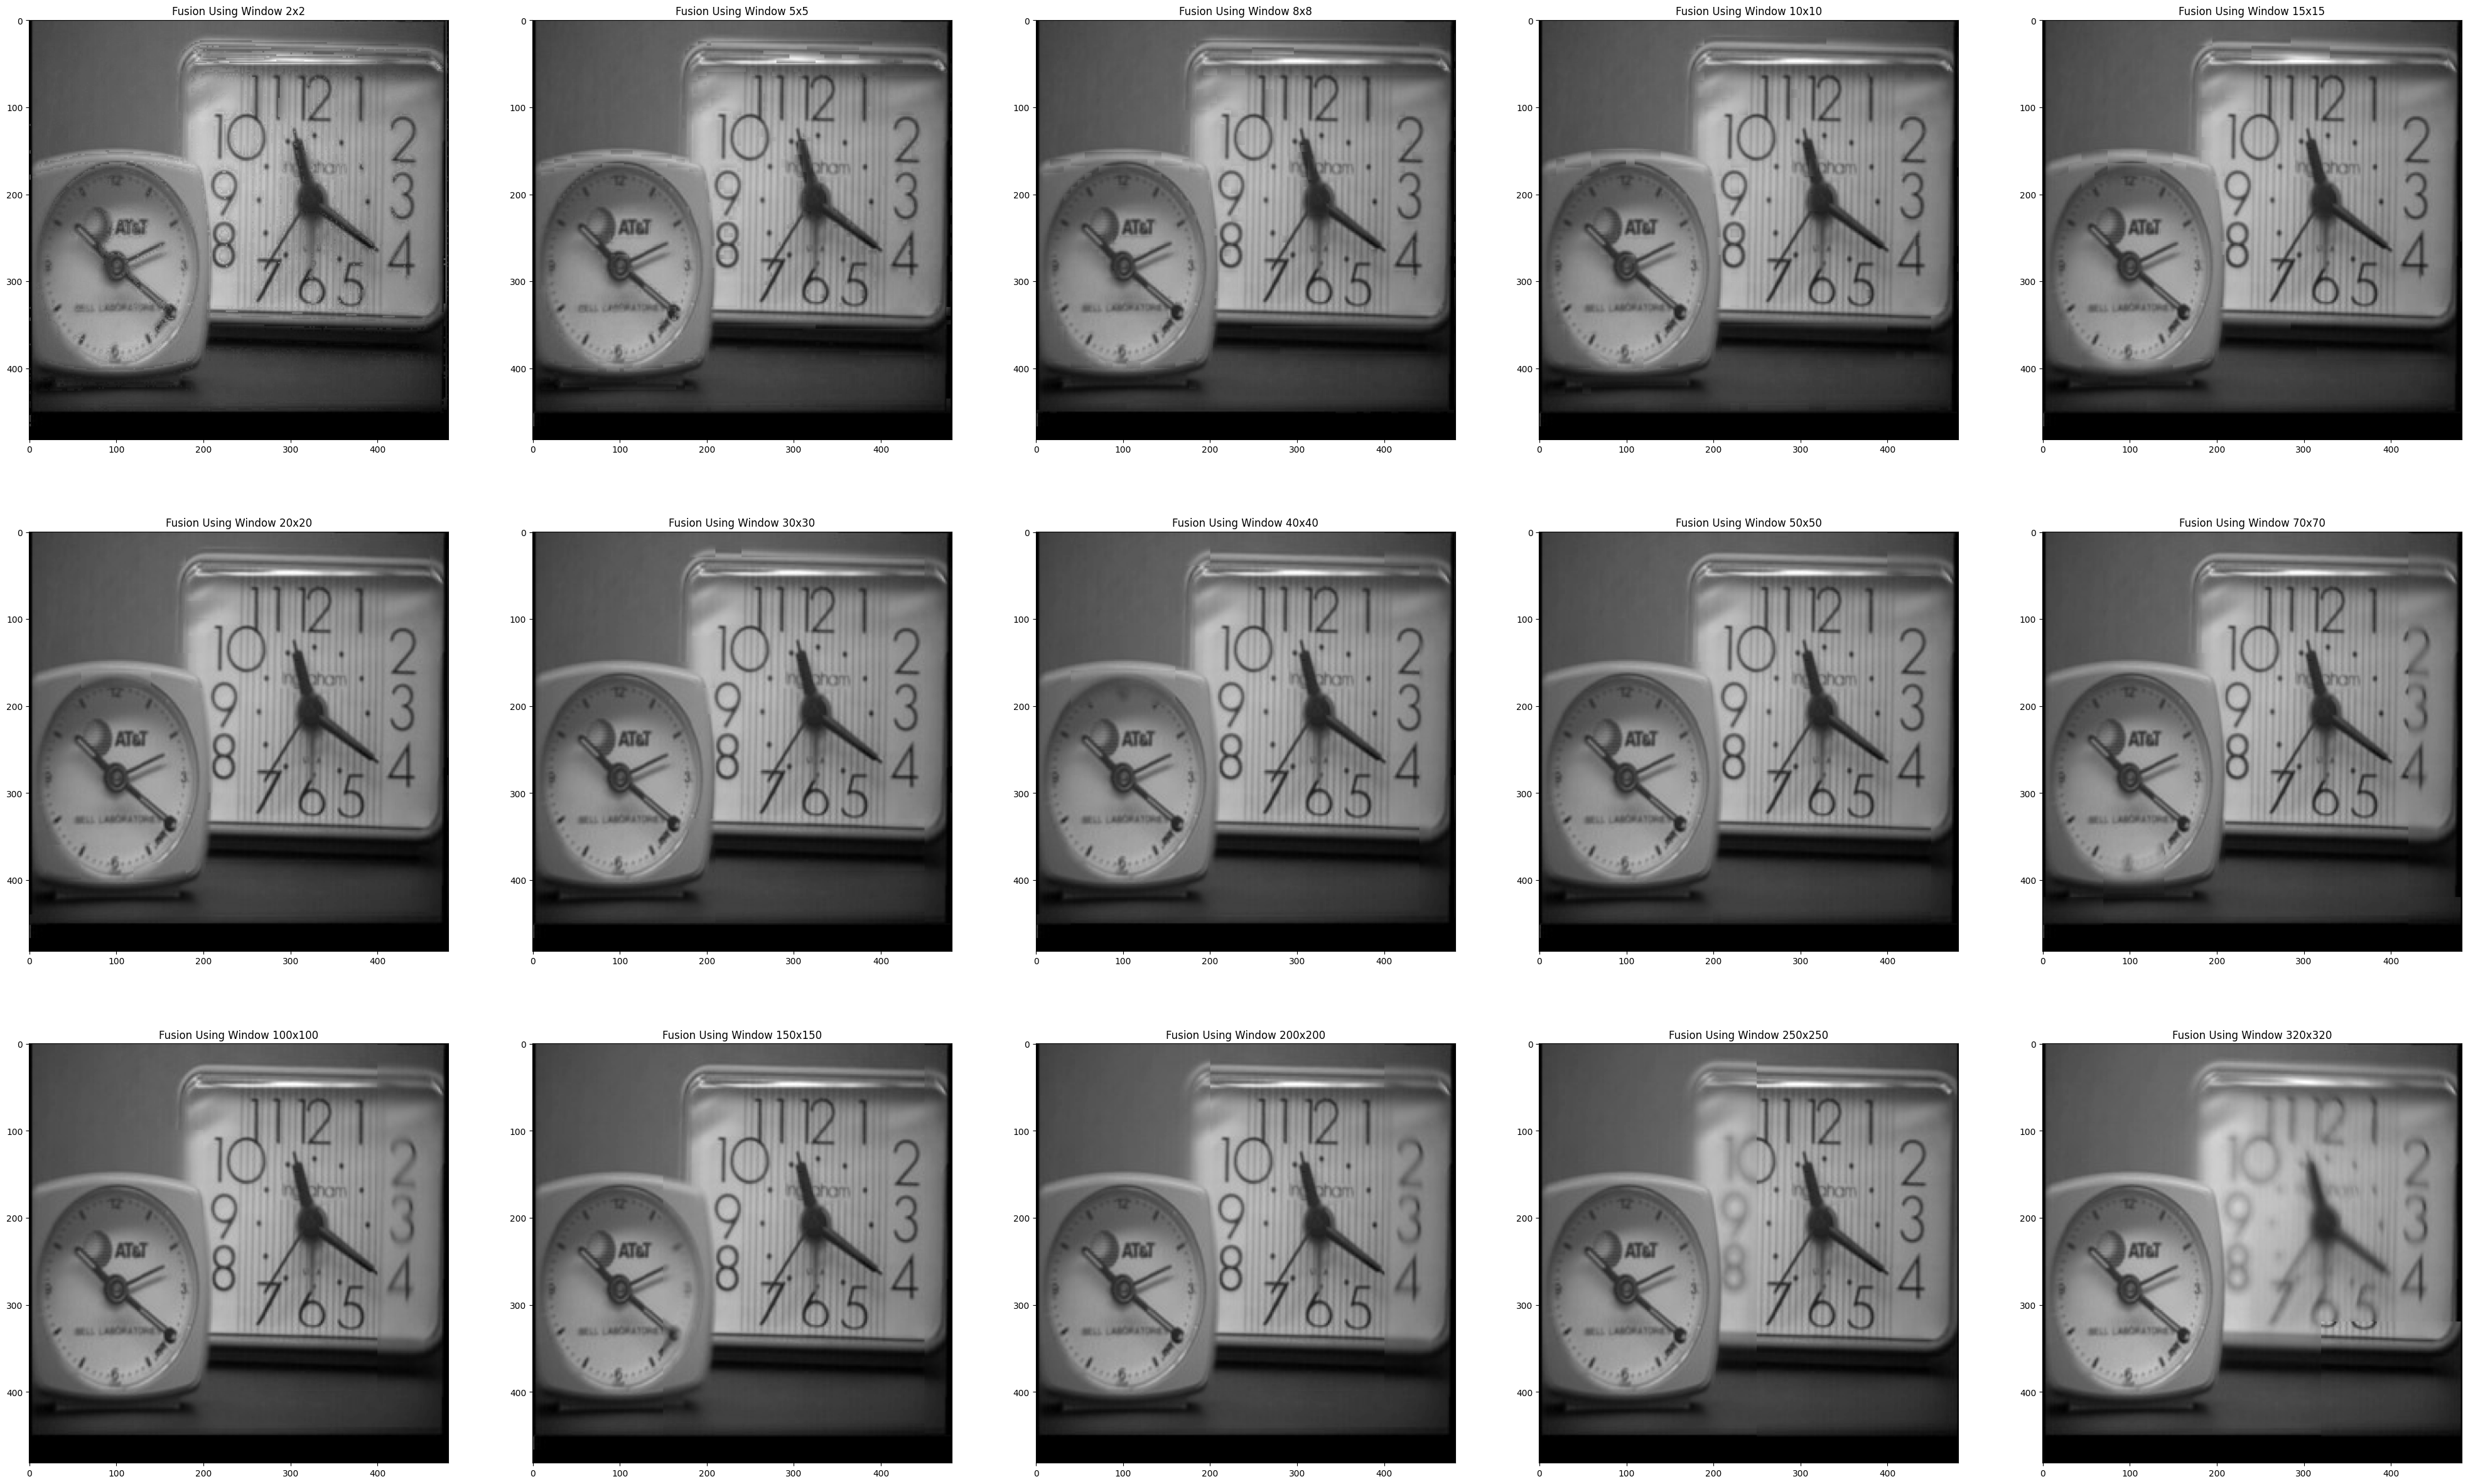

In [4]:
window_sizes = np.array( [ 2, 5, 8, 10, 15, 20, 30, 40, 50, 70, 100, 150, 200, 250, 320])

fig = plt.figure( figsize=( 50, 30))

for idx, window in enumerate( window_sizes):
	
	result = fusion( background, foreground, ( window, window))

	fig.add_subplot( 3, 5, idx + 1)
	plt.title( f"Fusion Using Window { window}x{ window}")
	plt.imshow( result, cmap="gray")

plt.show()

##### Driver #2

In [5]:
window_sizes = []
ssim_background_list = []
ssim_foreground_list = []

for window in range( 1, original_shape[ 0] + 1):
	
	result = fusion( background, foreground, ( window, window))

	background_ssim = ssim( result, background, data_range=255)
	foreground_ssim = ssim( result, foreground, data_range=255)

	window_sizes.append( window)
	ssim_background_list.append( background_ssim)
	ssim_foreground_list.append( foreground_ssim)

mean_ssim_list = np.array( [ ssim_background_list, ssim_foreground_list]).mean( axis=0)

##### Plot SSIM

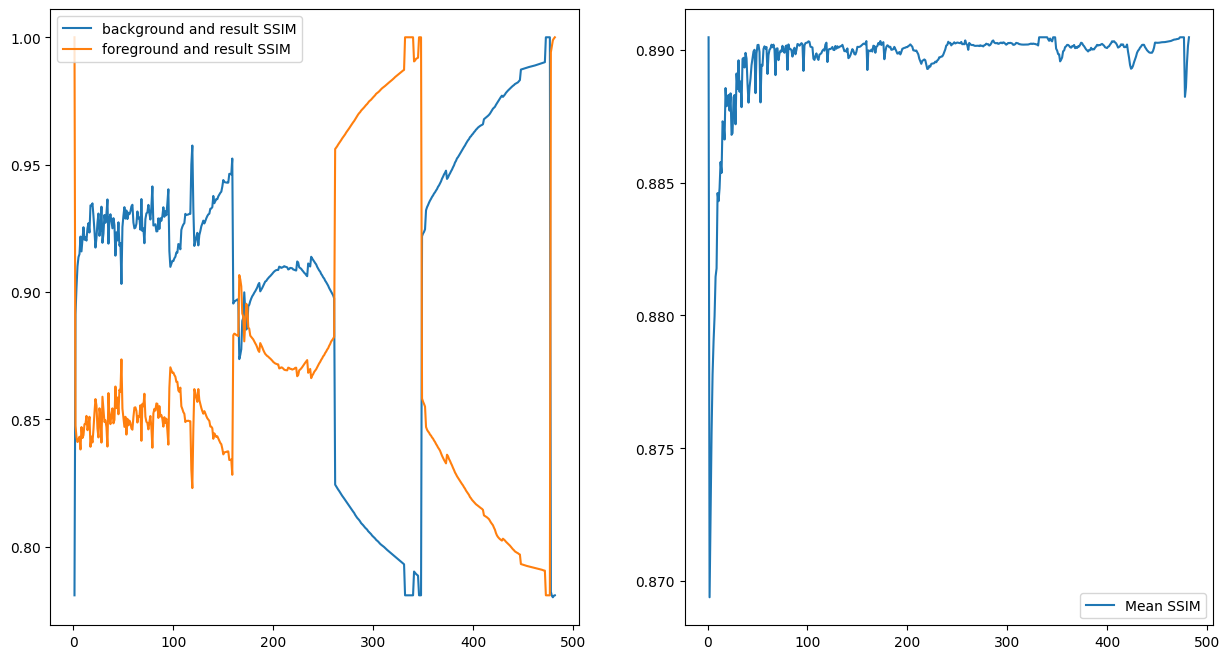

In [6]:
fig = plt.figure( figsize=( 15, 8))

fig.add_subplot( 1, 2, 1)
plt.plot( window_sizes, ssim_background_list, label="background and result SSIM")
plt.plot( window_sizes, ssim_foreground_list, label="foreground and result SSIM")
plt.legend()

fig.add_subplot( 1, 2, 2)
plt.plot( window_sizes, mean_ssim_list, label="Mean SSIM")
plt.legend()

plt.show()